### 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile as zip
import seaborn as sns

### 2. Read the dataset

In [2]:
with zip.ZipFile('bank.zip') as z:
    with z.open('bank.csv') as f:
        df = pd.read_csv(f, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### 3. Simple EDA for the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
for c in df.columns.to_list():
    if df[c].dtype == 'object':
        print(df[c].value_counts())
        print('\n' + '* - ' * 10)

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
married     2797
single      1196
divorced     528
Name: marital, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
no     4445
yes      76
Name: default, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
yes    2559
no     1962
Name: housing, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
no     3830
yes     691
Name: loan, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

* - * - * - * - * - * - * - * - * - * - 
may    1398
ju

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### 4. Extract Target and Features from the Dataset

In [6]:
y = df['y'].apply(lambda c: 1 if c == 'yes' else 0)

In [7]:
X = df.drop(labels=['y'], axis=1)

In [8]:
X.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2586,35,blue-collar,single,secondary,no,376,yes,yes,unknown,6,may,207,3,-1,0,unknown
4029,37,self-employed,married,secondary,no,487,no,yes,cellular,27,aug,155,15,-1,0,unknown
1727,34,technician,married,tertiary,no,197,no,no,cellular,20,aug,78,3,-1,0,unknown
3877,62,unknown,married,secondary,no,367,no,no,telephone,2,mar,139,5,-1,0,unknown
1233,37,blue-collar,married,secondary,no,131,yes,no,unknown,9,may,137,2,-1,0,unknown
4380,57,housemaid,married,secondary,no,0,no,no,cellular,22,aug,197,2,-1,0,unknown
3369,51,self-employed,divorced,secondary,no,1291,yes,no,unknown,3,jun,51,2,-1,0,unknown
2890,31,services,married,secondary,no,440,yes,no,unknown,17,jun,117,3,-1,0,unknown
4278,35,admin.,single,secondary,no,1810,yes,no,cellular,25,may,65,2,-1,0,unknown
2177,27,student,single,secondary,no,671,yes,no,unknown,7,may,332,2,-1,0,unknown


### 5. One-hot Coding the Categorical Features of the Dataset

In [9]:
X = pd.get_dummies(X)

In [10]:
X.sample(10)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4087,57,2137,8,132,7,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1606,41,4684,20,30,6,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2763,57,10,8,320,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1847,33,291,25,72,6,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
83,52,657,7,398,2,460,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
302,56,345,22,605,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2995,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4002,58,-123,5,131,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3068,43,64,6,230,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3571,26,2469,16,136,8,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 6. Scale the Numerical Features of the Dataset

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### 7. Model the Dataset Using Various SVM Algorithms

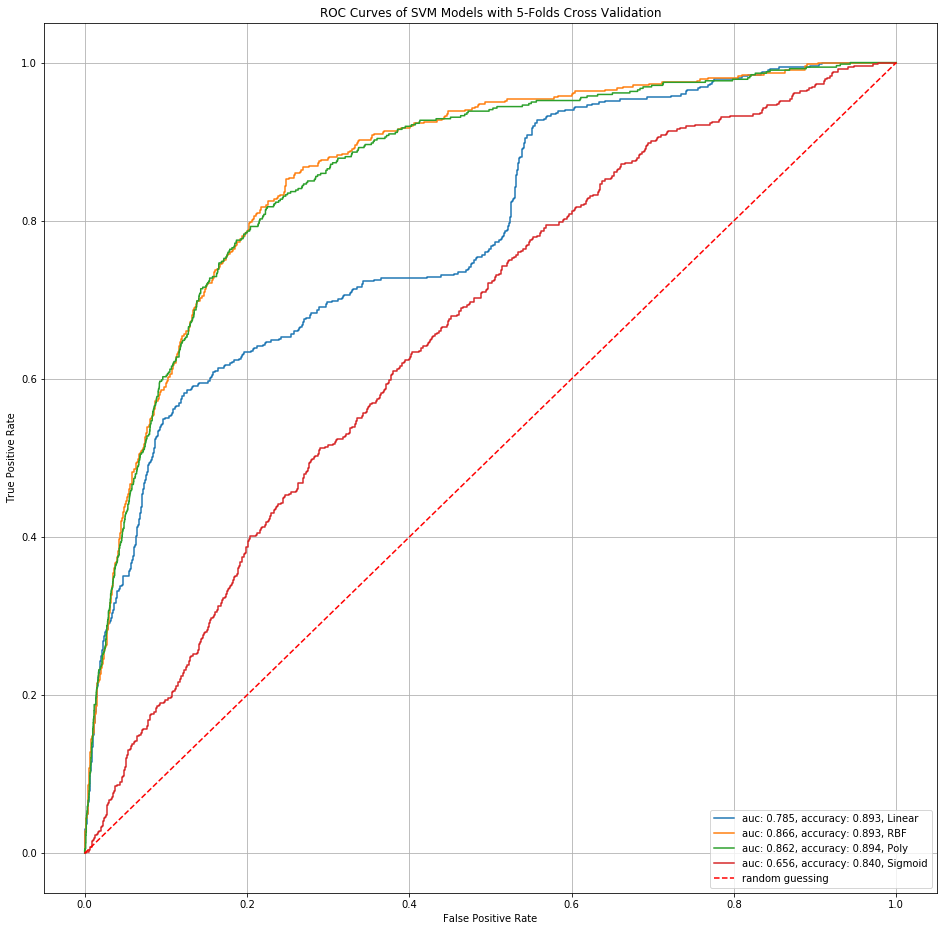

In [12]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create a dictionary of models to test
SVC_models = {'Linear': SVC(kernel='linear', probability=True),
              'RBF': SVC(kernel='rbf', probability=True),
              'Poly': SVC(kernel='poly', probability=True),
              'Sigmoid': SVC(kernel='sigmoid', probability=True)}

# Iterate through each model to train, predict, and plot the ROC curve
for name, model in SVC_models.items():
    # 10-fold cross validation, compute the probability of predictions and accuracy for y
    y_predict_proba = CVP(model, X_scaled, y, cv=5, method='predict_proba')
    y_predict = CVP(model, X_scaled, y, cv=5)
    accuracy = accuracy_score(y, y_predict)
    
    # Plot the ROC curves
    fpr, tpr, _ = roc_curve(y, y_predict_proba[:, 1])
    auc_score   = roc_auc_score(y, y_predict_proba[:, 1])
    plt.plot(fpr, tpr, label='auc: {:.3f}, accuracy: {:.3f}, {}'\
             .format(auc_score, accuracy, name))
    
plt.gcf().set_size_inches(16, 16)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red', label='random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of SVM Models with 5-Folds Cross Validation')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 8. Compare the Best SVM Algorithms with Linear Regression, LDA

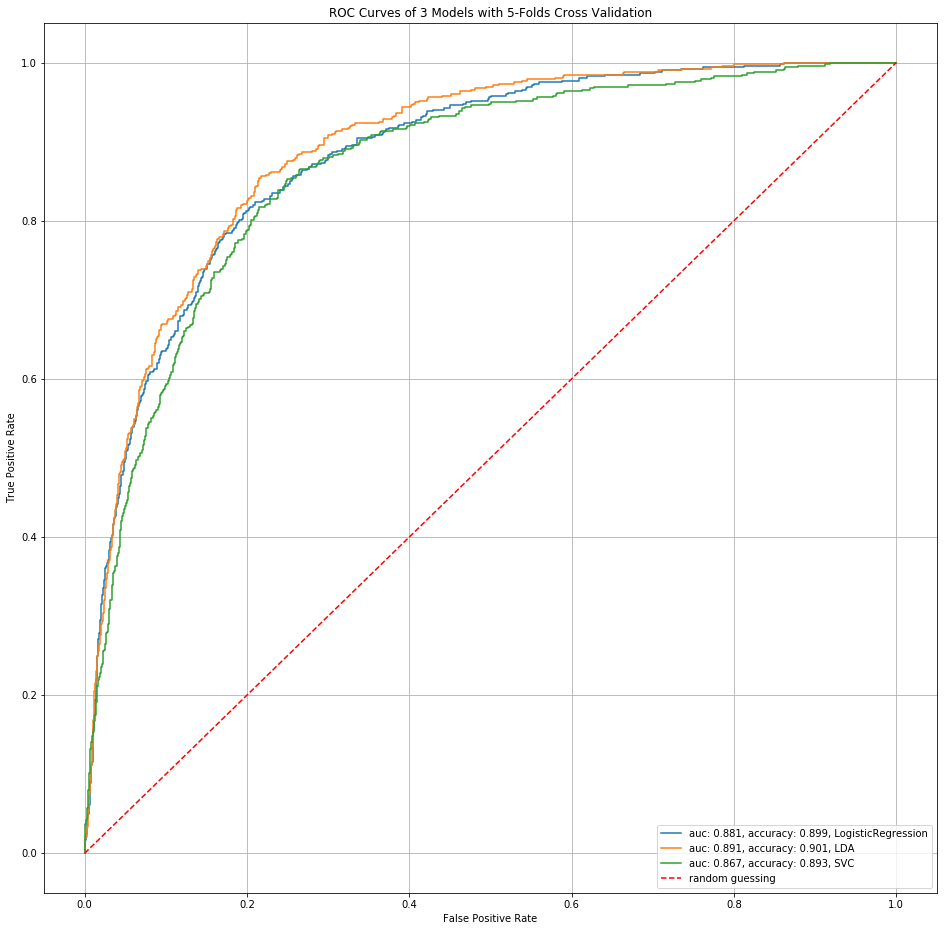

In [13]:
# Create a dictionary of models to test
models = {'LogisticRegression': LogisticRegression(),
          'LDA': LDA(),
          'SVC': SVC(probability=True)}

# Iterate through each model to train, predict, and plot the ROC curve
for name, model in models.items():
    # 10-fold cross validation, compute the probability of predictions and accuracy for y
    y_predict_proba = CVP(model, X_scaled, y, cv=5, method='predict_proba')
    y_predict = CVP(model, X_scaled, y, cv=5)
    accuracy = accuracy_score(y, y_predict)
    
    # Plot the ROC curves
    fpr, tpr, _ = roc_curve(y, y_predict_proba[:, 1])
    auc_score   = roc_auc_score(y, y_predict_proba[:, 1])
    plt.plot(fpr, tpr, label='auc: {:.3f}, accuracy: {:.3f}, {}'\
             .format(auc_score, accuracy, name))
    
plt.gcf().set_size_inches(16, 16)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red', label='random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of 3 Models with 5-Folds Cross Validation')
plt.grid()
plt.legend(loc='lower right')
plt.show()